In [27]:
# handle overfitting by using dropout 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd

In [28]:
df = pd.read_csv("sonar_dataset.csv")
df.sample(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
108,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,M
11,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
184,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,M
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R


In [29]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['R'] = le.fit_transform(df['R'])

In [31]:
X = df.drop('R',axis='columns')
y = df['R']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [32]:
X_train.shape

(155, 60)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(150, activation='leaky_relu'),
    keras.layers.Dense(70, activation='leaky_relu'),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dense(5, activation='leaky_relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50


5/5 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5677
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.6129
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6323
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.6645
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6839
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7032
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7161
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7484
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7613
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8258
Epoch 11/50
5/5 [==============================] -

In [34]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.8462


[0.499977707862854, 0.8461538553237915]

### Notice that accuracy: 0.7885 of test data and accuracy: 0.9548 in train data 
#### This indicates overfitting

2/2 [==============================] - 0s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

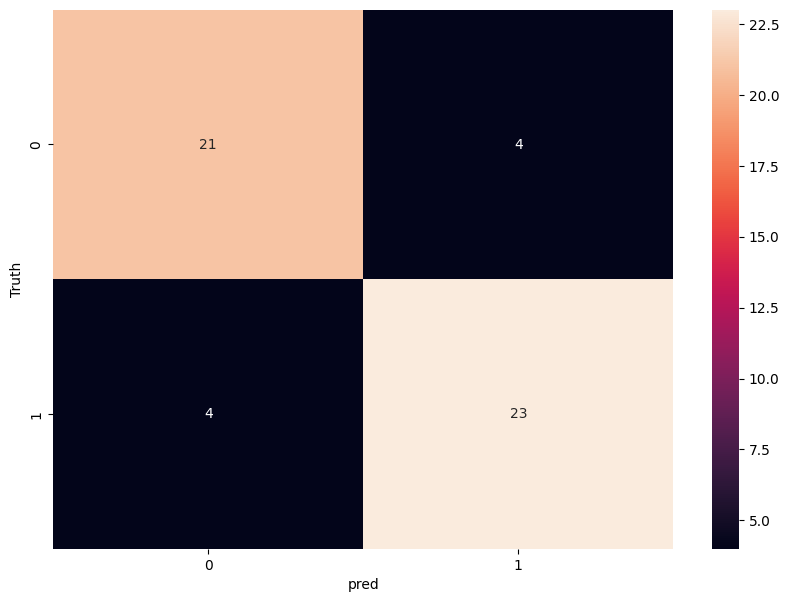

In [35]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [36]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.15384615384615385
Mean Absolute Error: 0.15384615384615385
R-squared: 0.38370370370370366
Accuracy Score: 0.8461538461538461
Confusion Matrix : 
[[21  4]
 [ 4 23]]
Full report : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.85      0.85      0.85        27

    accuracy                           0.85        52
   macro avg       0.85      0.85      0.85        52
weighted avg       0.85      0.85      0.85        52



# Model with Dropout

In [37]:
modeldrop = keras.Sequential([
    keras.layers.Dense(150, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(70, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeldrop.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modeldrop.fit(X_train, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.7488 - accuracy: 0.4452
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.5613
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.4581
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.4710
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.4968
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5097
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5548
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5871
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5419
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5613
Epoch 11/50
5/5 [======================

In [38]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.8462


[0.499977707862854, 0.8461538553237915]

2/2 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

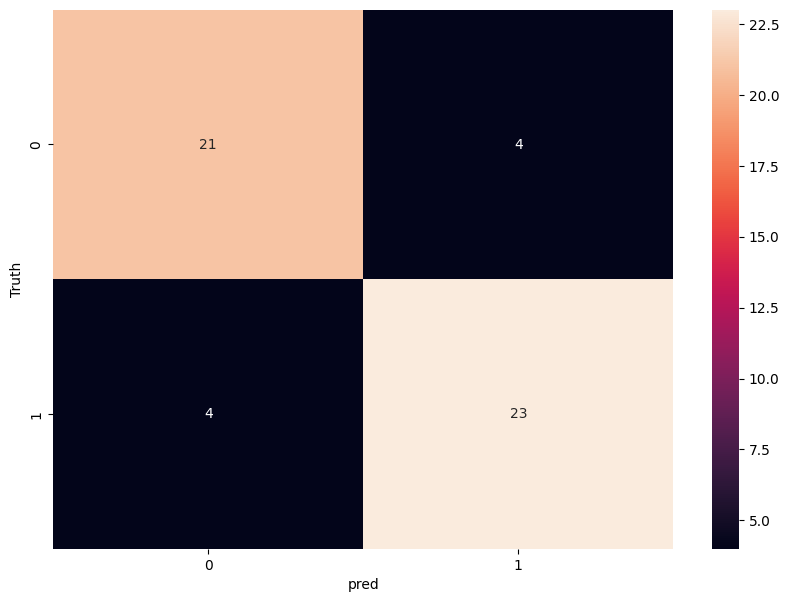

In [39]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [40]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.15384615384615385
Mean Absolute Error: 0.15384615384615385
R-squared: 0.38370370370370366
Accuracy Score: 0.8461538461538461
Confusion Matrix : 
[[21  4]
 [ 4 23]]
Full report : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.85      0.85      0.85        27

    accuracy                           0.85        52
   macro avg       0.85      0.85      0.85        52
weighted avg       0.85      0.85      0.85        52



# Notice that for testdata - accuracy: 0.8462 and traindata - accuracy: 0.6387 so an improvement